### Naive Bayes and Logistic Regression on MNIST data 

### Name: Deepak Reddy

In [415]:
from mnist import MNIST
import numpy as np
import random
import time
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


In [416]:
mndata = MNIST('MNIST')

In [417]:
images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()
images_train  = np.asarray(images_train)/255.
images_test  = np.asarray(images_test)/255.
labels_train = np.asarray(labels_train)
labels_test = np.asarray(labels_test)

In [20]:
#Defining mean and sigma matrices for each classes and including smoothing factor for very less variance value  
length = images_train.shape[1]
mean = np.zeros((10, length))
sigma = np.zeros((10, length))
for k in range(10):
    train_images_k = images_train[labels_train == k]
    for i in range(length):
        mean[k,i] = train_images_k[:,i].mean()
        sigma[k,i] = train_images_k[:,i].std()
        if sigma[k,i] <= 0.03 : sigma[k,i] = 0.03

### Defining functions and performing Naive bayes

In [21]:
def prob_image(x, mu, sigma):
    return np.exp(-(x - mu)**2./(2*sigma**2))

In [22]:
def predict(Img):
    prob = np.zeros(10)
    for i in range(10):
        p = prob_image(Img, mean[i], sigma[i])
        prob[i] = np.log(p).sum()
    return int(np.argmax(prob))

In [82]:
#Outputting total error and accuracy for images_test set
err = 0
pred = np.empty(len(labels_test))
for i in range(len(images_test)):
     pred[i] = predict(images_test[i])
     if pred[i] != labels_test[i]:
        err += 1
print("Error:", err)     
print("Accuracy:", (1-err/len(labels_test))*100)   

Error: 1809
Accuracy: 81.91


In [24]:
#Output confusion matrix 
y_actu = pd.Series(labels_test, name='Actual')
y_pred = pd.Series(pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

print(" ")
print("Accuracy matrix from confusion matrix:")
p = confusion_matrix(y_actu, y_pred)
a = np.zeros((p.shape))
for i in range(10):
    a[i] = np.float16(p[i])/p[i].sum()
a = np.around(a, decimals=3)
print(a*100)


Predicted  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Actual                                                     
0          887    0   18    3    3   27   12    1   29    0
1            0  891   51    9    0   82    7    0   94    1
2           14    0  901   21    7    8   18    8   54    1
3            7    0   82  792    4   53    5   15   31   21
4            7    0   27    2  721   66   13    5   51   90
5           20    0   18   56   14  726   15    5   24   14
6           12    1   33    0    2   37  856    0   17    0
7            0    0   15   11   25   17    1  828   45   86
8            8    1   31   23   16   92    5    4  770   24
9            3    0    6   10   74   28    0   31   38  819
 
Accuracy matrix from confusion matrix:
[[ 90.5   0.    1.8   0.3   0.3   2.8   1.2   0.1   3.    0. ]
 [  0.   78.5   4.5   0.8   0.    7.2   0.6   0.    8.3   0.1]
 [  1.4   0.   87.3   2.    0.7   0.8   1.7   0.8   5.2   0.1]
 [  0.7   0.    8.1  78.4   0.4   5.2   0.5   1.5 

### Accuracy of individual classes can be seen in the diagonal elements of the above accuracy matrix

Test digit: 7
image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 0


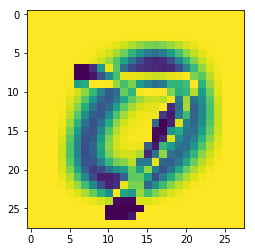

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 1


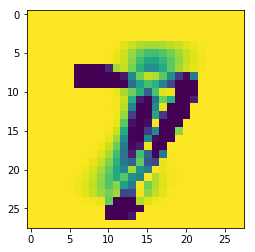

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 2


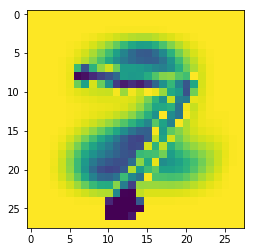

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 3


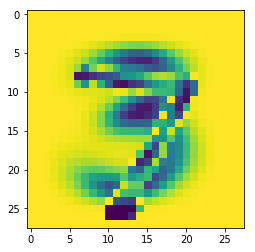

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 4


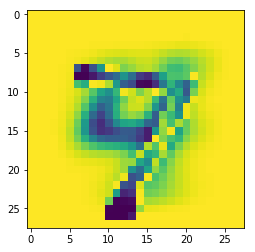

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 5


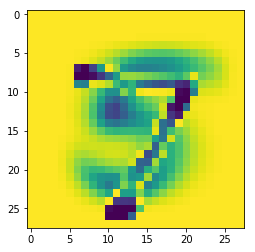

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 6


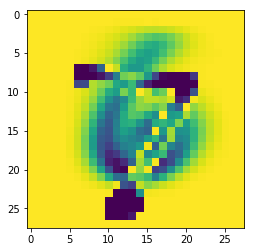

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 7


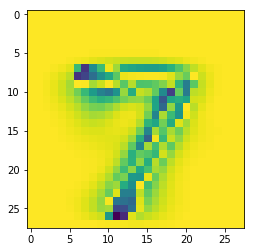

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 8


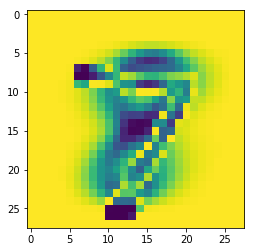

image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c = 9


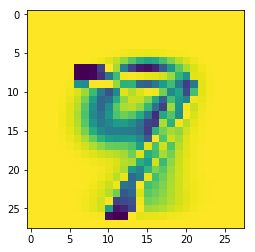

In [513]:
#Displaying the probabilities for the classes as 28*28 images
Img = images_test[0]
print("Test digit:",labels_test[0])
p = np.empty([10,len(Img)])
for i in range(10):
    p[i] = prob_image(Img, mean[i], sigma[i])
    print("image of P(xi|c),i= 1,2,...,784 as a 28×28 image for c =", i)
    data = np.reshape(p[i], (28, 28))
    plt.imshow(data)
    plt.show()

### Results
1. Both Confusion matrix and accuracy matrix are are shown as output and we observe a maximum accuracy of 90.5 for zero digit and minimum of 73.4 for digit 4. 
2. Images are shown for example prediction of 7 for all classes. We can see that colour yellow shows highest probability pixels and the probability value decreases with the intensity of blue colour. So the pixels overlapping with the test digit 7 have yellow colour in P(x/c=7).
3. Also, we can see the corresponding digit in each class image is blue as the probablity of the pixels in those areas is minimum as there is no corresponding pixel in 7.

### Logistic Regression on MNIST data

In [506]:
def cost(train_img, W, y, lamda):
    m =1 
    P = train_img.dot(W.T)
    return (1/m)*(np.log(1+np.exp(-y*P)).sum() + (lamda/2)*(W.dot(W.T)))

In [520]:
def sigmoid(x, y, W):
    p = x.dot(W.T)
    return 1/(1 + np.exp((-y*p)))#1/(1 + np.exp((-y*p).sum(axis=1)))

In [522]:
def diff_descent(x, y, W, lamda):
    m = 1
    p = sigmoid(x, y, W)
    #y = y.reshape(60000,1)
    #c= (1-p).reshape(60000,1)
    return -(1/m)*((y*(1-p)).dot(x)) + (1/m)*lamda*W 

In [523]:
#Implementing the logistic regression by updating the W using gradient descent
def logistic_regression(images_train, labels_train, c, lamda, learning_rate):
    train_images_c = images_train[labels_train == c]
    y_c = np.ones((len(train_images_c)))

    train_images_notc = images_train[labels_train != c]
    y_notc = -1*np.ones((len(train_images_notc)))

    W = np.ones(images_train.shape[1])

    train_images = np.vstack((train_images_c,train_images_notc))
    y = np.concatenate((y_c, y_notc), axis=0)

    L=[]
    for i in range(500):
        L.append(cost(train_images, W, y, lamda))
        W -= learning_rate*diff_descent(train_images, y, W, lamda)
    return W, L


In [517]:
#Performimg logistic regression and getting classifiers for each of 10 classes
#Adding coloumn of ones in first coloumn of images_train
X0 = np.ones((len(labels_train),1))

images_train1 = np.hstack((X0,images_train))
W_c = np.ones([10,images_train1.shape[1]])
L_c = []
lamda = 1
learning_rate = 0.001
for c in range(10):
    W_c[c], L = logistic_regression(images_train1, labels_train, c, lamda, learning_rate)
    L_c.append(L)

C:\Users\ddanda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Users\ddanda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [525]:
def test_predict(images_test, labels_test, c, W):
    X0 = np.ones((len(labels_test),1))

    images_test1 = np.hstack((X0,images_test))
    p = sigmoid(images_test1, np.array([1]), W)
    t = -1*np.ones(len(images_test1))
    t[np.where(labels_test == c)[0]] = 1
    #mat = []
    pred = np.zeros(len(images_test1))
    err = 0
    for i in range(len(images_test1)):
        if p[i] > 0.5:
            pred[i] = 1
        else:
            pred[i] = -1
        if pred[i] != t[i]:
            err += 1
            #mat.append(i)
    Total = labels_test[labels_test == c].shape[0]
    print("Prediction error =",err, "of total =", Total)
    acc = (1- err/Total)*100
    print("Accuracy = ",acc)
    return err 


In [543]:
for i in range(10):
    print("For class:",i)
    test_predict(images_test, labels_test, i, Q)

For class: 0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Derivation for regularized gradient descent used in my program

### $$L(w) =  \sum_{i=1}^{N} ln \left \{   1 \ + exp(-y_{i}W^{T}X_{i})\right \} + \frac{\lambda}{2}|W|_{2}^{2}$$
### $$\nabla L(w) =  \sum_{i=1}^{N} \frac{-y_{i}X_{i} \ exp(-y_{i}W^{T}X_{i})}{1 \ + exp(-y_{i}W^{T}X_{i})} \ + \ \lambda W$$
### $$W_{t+1} = W_{t} \ - \ \eta_{t} \nabla L(w)$$

In [515]:
Q = W_c

In [518]:
def log_reg_acc(images_test, W_c):
    pred = np.empty(len(images_test))
    for i in range(len(images_test)):
        prob = np.zeros(10)
        for j in range(len(W_c)):
            prob[j] = sigmoid(images_test[i], 1, W_c[j])
        pred[i] = np.argmax(prob)
    return pred

In [526]:
X0 = np.ones((len(labels_test),1))

images_test1 = np.hstack((X0,images_test))
pred = log_reg_acc(images_test1, W_c)

C:\Users\ddanda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [527]:
pred.shape

(10000,)

In [528]:
#Output confusion matrix 
y_actu = pd.Series(labels_test, name='Actual')
y_pred = pd.Series(pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

print(" ")
print("Accuracy matrix from confusion matrix:")
p = confusion_matrix(y_actu, y_pred)
a = np.zeros((p.shape))
for i in range(10):
    a[i] = np.float16(p[i])/p[i].sum()
a = np.around(a, decimals=3)
print(a*100)

Predicted  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
Actual                                                      
0          959     0    3    3    0    5    7    2    1    0
1            0  1089   16   10    1   14    4    1    0    0
2            8    24  887   33   12   19   12   19   11    7
3            4     0   15  920    1   52    3    7    2    6
4            1     6    6    6  903    9   13    1    2   35
5           11     3    2   29    6  822   10    0    7    2
6           13     5   14    5    9   51  861    0    0    0
7            5     7   21   20    7    8    1  931    0   28
8           12    74    9  121    8  294    9   12  422   13
9            8    13    7   25   52   49    0   33    0  822
 
Accuracy matrix from confusion matrix:
[[ 97.9   0.    0.3   0.3   0.    0.5   0.7   0.2   0.1   0. ]
 [  0.   95.9   1.4   0.9   0.1   1.2   0.4   0.1   0.    0. ]
 [  0.8   2.3  85.9   3.2   1.2   1.8   1.2   1.8   1.1   0.7]
 [  0.4   0.    1.5  91.1   0.1   5.1 

In [537]:
Accuracy = np.trace(p)
print("Accuracy for logistic Regression:",(Accuracy/10000)*100)

Accuracy for logistic Regression: 86.16


Weight matrix of class 0 in image


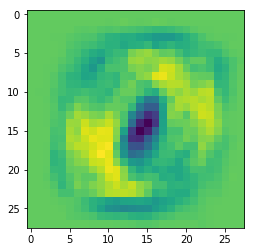

Weight matrix of class 1 in image


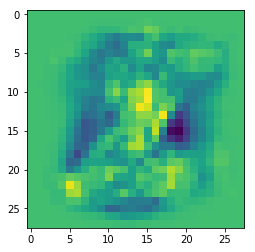

Weight matrix of class 2 in image


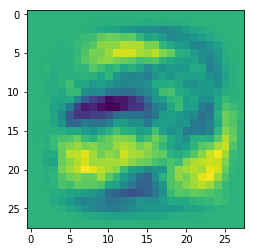

Weight matrix of class 3 in image


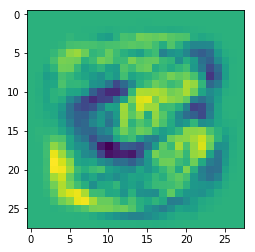

Weight matrix of class 4 in image


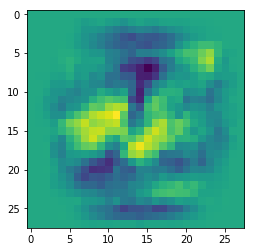

Weight matrix of class 5 in image


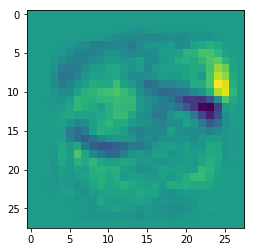

Weight matrix of class 6 in image


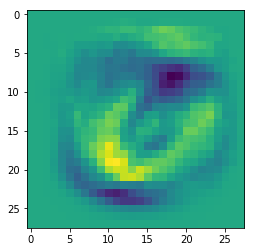

Weight matrix of class 7 in image


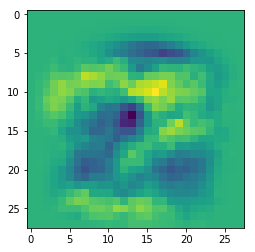

Weight matrix of class 8 in image


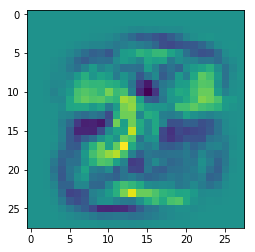

Weight matrix of class 9 in image


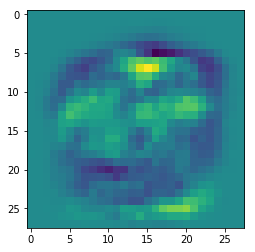

In [540]:
#Displaying the weight matrices for the classes as 28*28 images
for i in range(10):
    p = W_c[i][1:]
    data = np.reshape(p, (28, 28))
    plt.imshow(data)
    print("Weight matrix of class", i, "in image")
    plt.show()

### Results:
1. Weight matrices are shown as images for all the classes and we can see the pattern of the class digit in the images. The pattern is more visible for the class digits with higher accuracy.
2. Seperate classifiers are built for each class using one Vs rest method and then each test image is predicted by using these classifiers and selecting one with highest probability value.
3. We can see the accuracy of logistic regression of 86.16 to be better than the accuracy of Naive bayes which is 81.9.